## 1. 중학 실력 Test 데이터

ISHERPA_2010 > TBL_WWW_SelfTest_Info, TBL_WWW_SelfTest_Wrong_Note_EduBase 테이블 사용

### 1-1. 데이터 불러오기

In [2]:
import pandas as pd

dataset1 = pd.read_csv('./중학실력Test_문항별정오답.csv')
dataset1.head()



,idx,guid,st_year,Test_Name,Subject,Subject2,Grade,Grade2,Term,Test_Level,take_date,test_time,Test_Jumsu,QuizNum,QuizCode,QuizYN,QuizAnswer
0,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,20,40094723,N,④
1,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,19,40095385,Y,⑤
2,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,18,40094651,Y,6
3,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,17,40095295,Y,②
4,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,16,40095274,Y,①


In [3]:
dataset1['Grade'].unique()

array([8, 7, 9], dtype=int64)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#비율 확인해볼거 st_year, Grade
col_list = list(dataset1.columns)
#for i in col_list:
#    print(i, dataset1[i].unique())


In [5]:
dataset1['Grade2'].unique()

array(['8', '7', '9', 'B', 'C'], dtype=object)

In [6]:
dataset1.head()

,idx,guid,st_year,Test_Name,Subject,Subject2,Grade,Grade2,Term,Test_Level,take_date,test_time,Test_Jumsu,QuizNum,QuizCode,QuizYN,QuizAnswer
0,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,20,40094723,N,④
1,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,19,40095385,Y,⑤
2,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,18,40094651,Y,6
3,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,17,40095295,Y,②
4,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,16,40095274,Y,①


In [7]:
dataset1['Test_Level'].unique()

array(['04;03', '02;01', '02', '01', nan, '05;03;02;01', '04;03;02',
       '05;04;03', '05;02;01', '05;04;03;02;01', '03;02;01', '03;02',
       '05;04', '04;03;02;01', '05;03;01', '05;04;03;02', '04',
       '05;04;03;01', '03', '05;04;01', '05;01', '05', '04;02',
       '05;04;02;01', '04;01', 'undefined04;03;02;01', '01;02;03;04;05',
       '03;01', '05;03', '05;03;02', '02;03;04', '04;05', '01;02;03',
       '03;04', '02;03', '02;03;04;05', '01;02'], dtype=object)

In [8]:
dataset1['Test_Name'].unique()[:20]

array(['수수행대비', '수학 2-2 ( 1단원)', '2', '좌표평면 하', '수학_삼각비', '시험', '1', '3',
       '수학', '1학기전체(수와연산~이차함수)/ 중~최하', '좌표 1', '이 아프다', '수학1', '영어 시험지',
       '이제 기술이 재미있어질 시간', '8월 24일 수학', '8월 25일 수학', '0804수학 중하',
       '2-1 문자의 사용과 식의계산(하80!)-숙제', '111'], dtype=object)

### 1-2. 데이터 컬럼 설명

- idx : 인덱스
- guid : 회원아이디
- st_year : 년도
- Test_Name : 시험지명
- Subject : 교과
- Subject2 : 과목
- Grade : 학년
- Grade2 : 사용자가 선택한 학년
- Term : 학기
- Test_Level : 시험 난이도 (01 최하 ~ 05 최상)
- take_date : 시험응시일
- test_time : 제출시간(초)
- Test_Jumsu : 시험점수
- QuizNum : 시험순번
- QuizCode : 퀴즈코드(문항코드)
- QuizYN : 문항정오답
- QuizAnswer : 사용자입력답

### 1-3. 데이터 활용 아이디어

- 문항별 정오답을 예측해보기 (로지스틱 회귀로 분류)


- 시험 점수를 예측해보기 (선형 회귀)


In [9]:

dataset1['QuizYN'] = dataset1['QuizYN'].map({'Y':1.0,'N':0.0})

In [10]:
labels = dataset1['QuizYN']

In [11]:
col_list = ['Grade','Grade2','Test_Jumsu','Subject'] #Subject는 one-hot encoding
#new_df = pd.DataFrame(index=dataset1['QuizCode'],columns=dataset1[col_list])

In [12]:
all_list = list(dataset1.columns)
cols = list(set(all_list)-set(col_list))


In [13]:
dataset1 = dataset1.drop(columns=cols,axis=1)

In [14]:
print(dataset1.columns)

Index(['Subject', 'Grade', 'Grade2', 'Test_Jumsu'], dtype='object')


In [15]:
print(dataset1.head())
#subject -> one-hot
#Grade/Grade2/Test_Jumsu -> Min-Max scale
oh_enc = pd.get_dummies(dataset1['Subject'],dtype=float)
print(oh_enc)

  Subject  Grade Grade2  Test_Jumsu
0      MM      8      8          85
1      MM      8      8          85
2      MM      8      8          85
3      MM      8      8          85
4      MM      8      8          85
         CO   EW   HC   HH   HM   HO   KO   MM   MO   NN   SS   TE   UW   UY  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
250185  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
250186  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
250187  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1

In [16]:
dataset1 = dataset1.drop('Subject',axis=1)


In [17]:
t = pd.concat([dataset1,oh_enc],axis=1)
print(t)

        Grade Grade2  Test_Jumsu   CO   EW   HC   HH   HM   HO   KO   MM   MO  \
0           8      8          85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1           8      8          85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2           8      8          85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3           8      8          85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4           8      8          85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
...       ...    ...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
250185      7      8          60  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
250186      7      8          60  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
250187      7      8          60  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
250188      7      8          60  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
250189      7      8          60  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         NN   SS   TE   UW 

In [18]:
from sklearn.preprocessing import MinMaxScaler
col_list = ['Grade','Grade2','Test_Jumsu']
scaler = MinMaxScaler()
import numpy as np
#print(t['Grade2'].unique())
def change_data(data):
    if data == 'B':
        data = 8
    elif data == 'C':
        data = 7
    else:
        data = int(data)
    return data
t['Grade2'] = t['Grade2'].apply(lambda x : change_data(x))


In [19]:
for i in col_list:
    t[i] = scaler.fit_transform(np.array(t[i]).reshape(-1,1))

In [20]:
print(t['Test_Jumsu'].describe())

count    250190.000000
mean          0.698537
std           0.272415
min           0.000000
25%           0.600000
50%           0.800000
75%           0.900000
max           1.000000
Name: Test_Jumsu, dtype: float64


In [21]:
#로지스틱 회귀로 정오답 분류
#선형회귀로 점수 예측 -> label 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logits = LogisticRegression()

all_data = pd.concat([t,labels],axis=1)
train_x, test_x, train_y , test_y = train_test_split(t,labels,train_size=0.6,random_state=42,shuffle=True)

In [22]:
logits.fit(train_x,train_y)

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(logits.score(test_x,test_y))

0.7995223630041168


<Axes: >

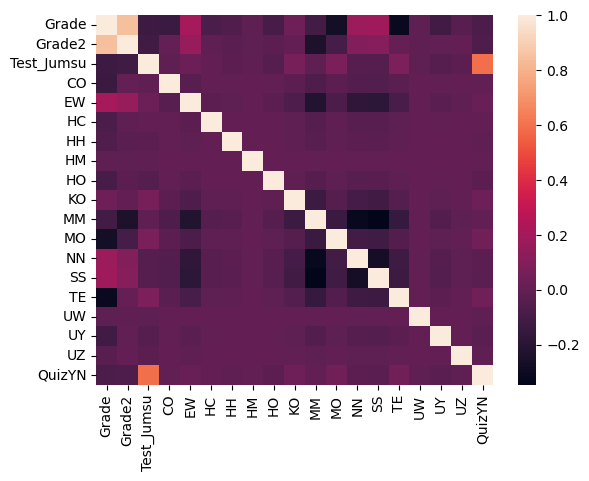

In [24]:

sns.heatmap(all_data.corr()) #여러가지 데이터 중 라벨값과 연관이 높은 것은 Test_Jumsu와 깊은 연관이 있고 나머지는 그렇게 연관성이 있지 않다. 

In [25]:
second_label = t['Test_Jumsu']*100

In [26]:
t = t.drop('Test_Jumsu',axis=1)

In [27]:
#Test_Jumsu를 예측하기 위해서 Grade와 Subject 사용
from sklearn.linear_model import LinearRegression
trainx2, testx2, trainy2, testy2 = train_test_split(t,second_label,train_size=0.6,random_state=42,shuffle=True)

In [28]:
linear = LinearRegression().fit(trainx2,trainy2)

In [29]:
print(linear.score(testx2,testy2))
print(linear.score(trainx2,trainy2)) #전혀 예측 못함 

0.03641182893333428
0.03964235326728405


In [30]:
t['QuizYN'] = labels
from sklearn.linear_model import LinearRegression
trainx2, testx2, trainy2, testy2 = train_test_split(t,second_label,train_size=0.6,random_state=42,shuffle=True)
linear = LinearRegression().fit(trainx2,trainy2)
print(linear.score(testx2,testy2))
print(linear.score(trainx2,trainy2)) #넣으니까 그나마 상승

0.3679796514573378
0.36916935990978583


## 2. 월간 학습자 통계 데이터

### 2-1. 데이터 불러오기

In [31]:
dataset2 = pd.read_csv('./월간학습자통계.csv',index_col=0)
dataset2.head()

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,44,학습생(만료),"01,44",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초등,초5,44,학습생(만료),"-,00,01,44",3,0,15,...,1.0,1.0,100.0,1.0,1.0,NaN,NaN,NaN,2022,9


In [32]:
dataset2['memberstatus_codename'].value_counts()

memberstatus_codename
학습생(만료)       109892
학습생(정)        100000
학습생(미납_중지)      1067
학습생(탈퇴)          892
Name: count, dtype: int64

### 2-2. 데이터 컬럼 설명

- userid : 인덱스
- gender : 회원아이디
- membertype_codename : 회원구분 코드의 한글명(학교급) ex. 초등
- grade_codename : 학년 코드
- memberstatus : 회원상태 (정회원, 준회원, 탈퇴회원 등)
- memberstatus_codename : 회원상태 코드의 한글명
- memberstatus_change : 월 중 회원상태 변화
- status_null_count : 회원상태 없음 일수
- statusgroup_10_count : 임시회원 일수
- statusgroup_20_count : 무료회원 일수
- statusgroup_30_count : 유료회원 일수
- statusgroup_40_count : 중지회원 일수
- statusgroup_50_count : 만료회원 일수
- statusgroup_90_count : 해지회원 일수
- point_gain_activeday_count : 포인트 획득일수
- point_gain_count : 포인트 획득 횟수
- point_gain : 획득 포인트
- point_loss_activeday_count : 포인트 차감일수
- point_loss_count : 포인트 차감 횟수
- point_loss : 차감 포인트
- tablet_activeday_count : 기기 활성 횟수
- tablet_moved_menu_count : 기기 메뉴이동 횟수
- tablet_leave_count :기기 물리적 종료 횟수
- tablet_resume_count : 기기 물리적 재개 횟수
- tablet_login_count : 로그인 횟수
- tablet_logout_count : 기기 로그아웃 횟수
- study_activeday_count :학습 활성일 횟수
- study_count : 학습 횟수
- study_notcompleted_count : 학습 미완료 횟수
- study_completed_count : 학습 완료 횟수
- study_restart_count : 학습 재시작 횟수
- total_system_learning_time : 학습 시간합계(시스템)
- total_caliper_learning_time : 학습 시간합계(캘리퍼)
- media_activeday_count : 미디어 활동 활성 일수
- media_count : 미디어 학습 횟수
- video_action_count : 비디오 활동 횟수
- video_start_count : 비디오 시작 횟수
- video_restart_count : 비디오 재시작 횟수
- video_pause_count : 비디오 일시정지 횟수
- video_jump_count : 비디오 점프 횟수
- video_resume_count : 비디오 재개(일시정지 후 횟수)
- video_speed_count : 비디오 속도 조절 횟수
- video_volume_count : 비디오 볼륨 조절 횟수
- video_end_count : 비디오 종료 횟수
- test_activeday_count : 평가 활성 일수
- test_count : 평가 횟수
- test_average_score : 평가 평균 점수
- test_item_count : 평가 문항 개수
- test_correct_count : 평가 정답 개수
- wrong_count : 오답 노트 진입 횟수
- wrong_item_count : 오답 노트 문항 개수
- wrong_correct_count : 오답 노트 정답 개수
- yyyy : 년
- mm : 월

### 2-3. 데이터 활용 아이디어

- 학생별 평가 평균 점수 예측하기 (선형 회귀)


- 유사한 학습 횟수를 가지는 학생 군집화

In [33]:
#학생별 평가 평균 점수 예측하기 (선형 회귀)
#유사한 학습 횟수를 가지는 학생들 군집화
print(dataset2['userid'].value_counts()) #여러개씩 가지는 학생들 존재함 
print(dataset2.query("userid == '1538cde9-faa9-4f4e-9f4c-a1be1e0d6418'"))


userid
1538cde9-faa9-4f4e-9f4c-a1be1e0d6418    8
01157edf-3298-4c62-9cd6-a41b82cce31a    8
62065ed5-0a6b-453a-a381-35bcc81fe012    8
2efe4b08-5c0b-4166-9b87-99e903926ec1    8
177dabf0-c066-4b2f-9dea-f8171035df6a    8
                                       ..
49bee27e-fb8f-45f2-ba87-0fdbc1b4fc98    1
4957e8eb-c607-4daa-9787-d5d596aada60    1
47fa7da6-d21f-46df-80ce-76e86bff777d    1
4703955f-6174-4d22-8e49-45d5c26b9f4a    1
89c41bcf-28e5-4fd8-a475-96ffb2256391    1
Name: count, Length: 144091, dtype: int64
                                      userid gender membertype_codename  \
2511    1538cde9-faa9-4f4e-9f4c-a1be1e0d6418      F                  초등   
46543   1538cde9-faa9-4f4e-9f4c-a1be1e0d6418      F                  초등   
58546   1538cde9-faa9-4f4e-9f4c-a1be1e0d6418      F                  초등   
61631   1538cde9-faa9-4f4e-9f4c-a1be1e0d6418      F                  초등   
83584   1538cde9-faa9-4f4e-9f4c-a1be1e0d6418      F                  초등   
96946   1538cde9-faa9-4f4e-9f4c-a1be1e0

In [34]:
#확인해본 결과 같은 아이디라도 다양한 값을 가지고 있음 따라서 하나의 아이디로 통합하는 것은 좋지않음
labels = dataset2['test_average_score']
dataset2 = dataset2.drop('test_average_score',axis=1)

- memberstatus : 회원상태 (정회원, 준회원, 탈퇴회원 등)
- point_gain_count : 포인트 획득 횟수
- point_gain : 획득 포인트
- point_loss_count : 포인트 차감 횟수
- point_loss : 차감 포인트
- tablet_activeday_count : 기기 활성 횟수
- study_activeday_count :학습 활성일 횟수
- study_count : 학습 횟수
- study_completed_count : 학습 완료 횟수
- total_system_learning_time : 학습 시간합계(시스템)
- media_count : 미디어 학습 횟수
- video_action_count : 비디오 활동 횟수
- test_count : 평가 횟수
- test_average_score : 평가 평균 점수
- wrong_count : 오답 노트 진입 횟수


In [35]:
col_list = ['memberstatus','point_gain_count','point_gain','point_loss_count','point_loss','tablet_activeday_count','study_activeday_count','study_count','study_completed_count','total_system_learning_time','media_count','video_action_count','test_count','wrong_count']
all_list = list(dataset2.columns)
diff_list = list(set(all_list)-set(col_list))
dataset2 = dataset2.drop(columns=diff_list,axis=1)

In [36]:
print(dataset2.dtypes)

memberstatus                    int64
point_gain_count              float64
point_gain                    float64
point_loss_count              float64
point_loss                    float64
tablet_activeday_count        float64
study_activeday_count         float64
study_count                   float64
study_completed_count         float64
total_system_learning_time    float64
media_count                   float64
video_action_count            float64
test_count                    float64
wrong_count                   float64
dtype: object


In [37]:
#전부다 continious data
print(dataset2.isna().sum())

memberstatus                       0
point_gain_count                4208
point_gain                      4208
point_loss_count                4208
point_loss                      4208
tablet_activeday_count         70333
study_activeday_count          79057
study_count                    79057
study_completed_count          79057
total_system_learning_time     80322
media_count                    81190
video_action_count             82754
test_count                     84937
wrong_count                   140210
dtype: int64


In [38]:
for i in col_list:
    print(dataset2[i].describe())

count    211851.000000
mean         28.719081
std          17.062375
min          11.000000
25%          11.000000
50%          44.000000
75%          44.000000
max          88.000000
Name: memberstatus, dtype: float64
count    207643.000000
mean         62.093092
std          72.317206
min           0.000000
25%           0.000000
50%          32.000000
75%         113.000000
max        1519.000000
Name: point_gain_count, dtype: float64
count    2.076430e+05
mean     8.639618e+02
std      3.984285e+03
min      0.000000e+00
25%      0.000000e+00
50%      4.100000e+02
75%      1.420000e+03
max      1.000036e+06
Name: point_gain, dtype: float64
count    207643.000000
mean          1.313196
std           3.405631
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max         163.000000
Name: point_loss_count, dtype: float64
count    207643.000000
mean       -921.356135
std        2728.462001
min     -389367.000000
25%        -806.000000
50%        

In [39]:
for i in col_list:
    if i == 'memberstatus':
        pass
    else:
        dataset2[i] = dataset2[i].fillna(dataset2[i].median())

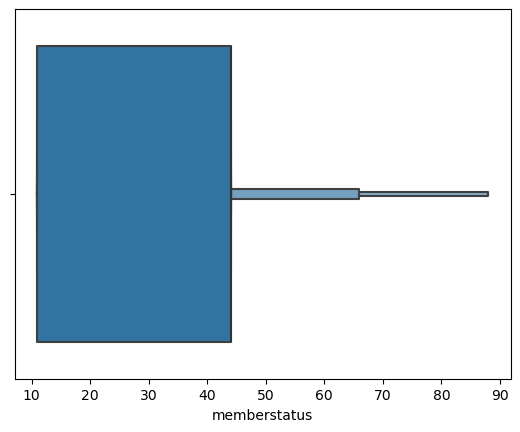

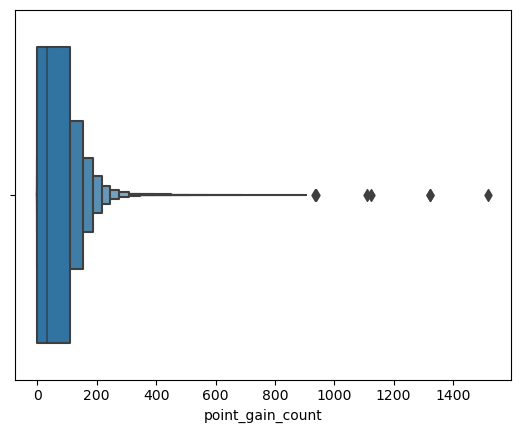

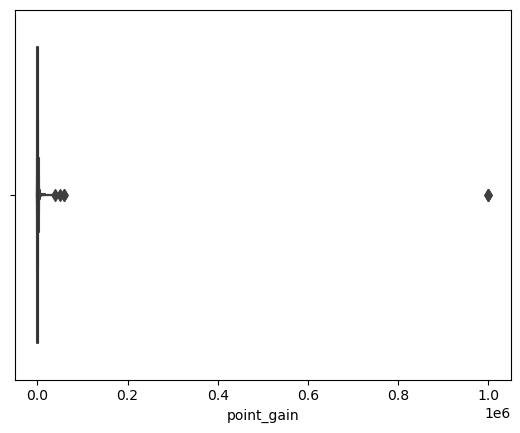

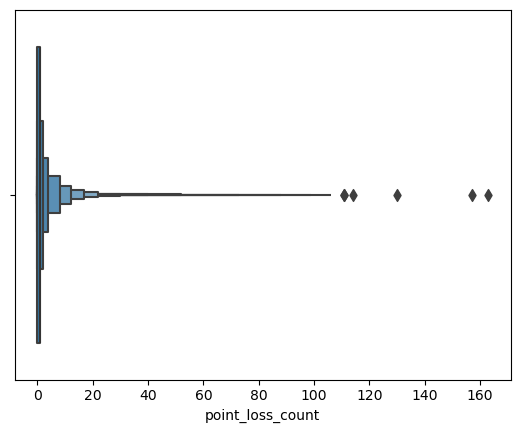

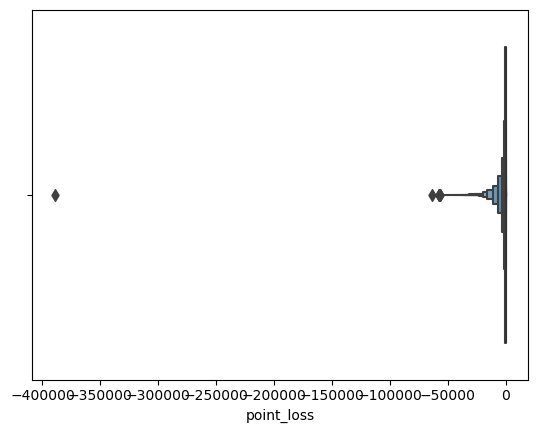

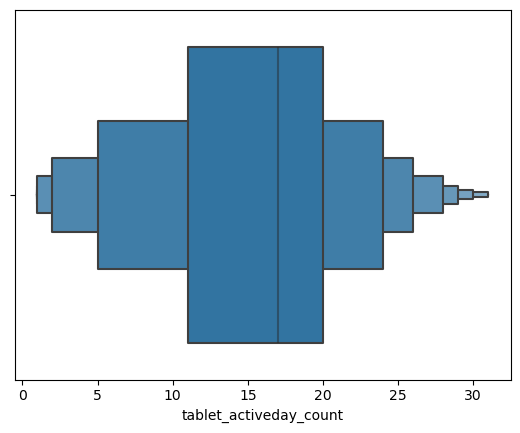

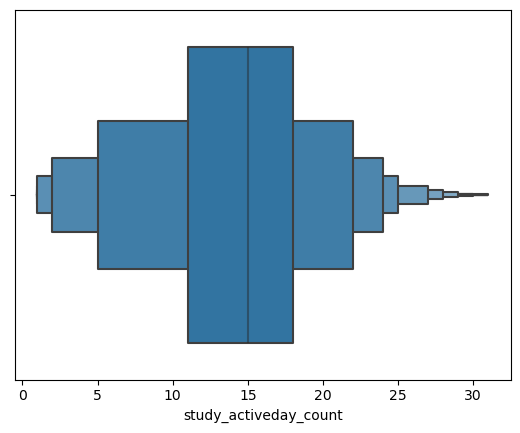

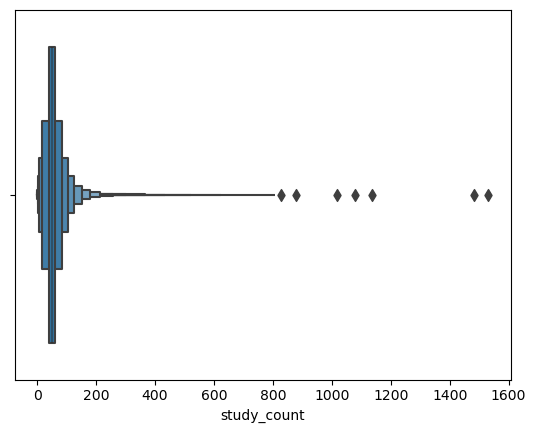

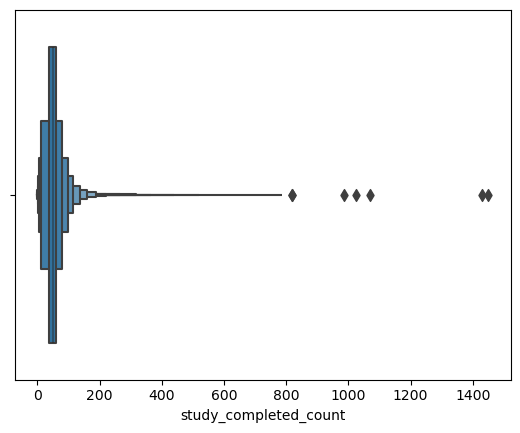

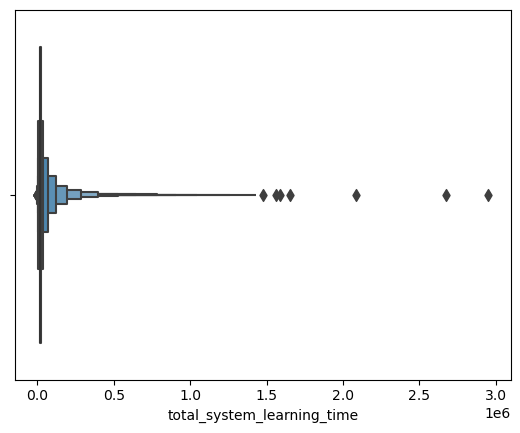

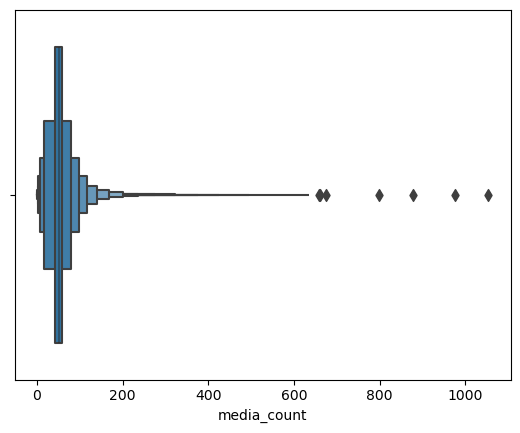

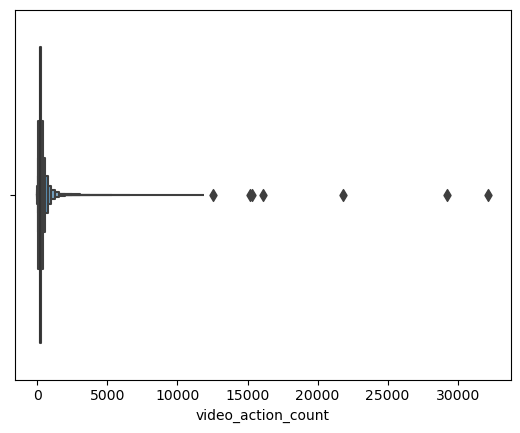

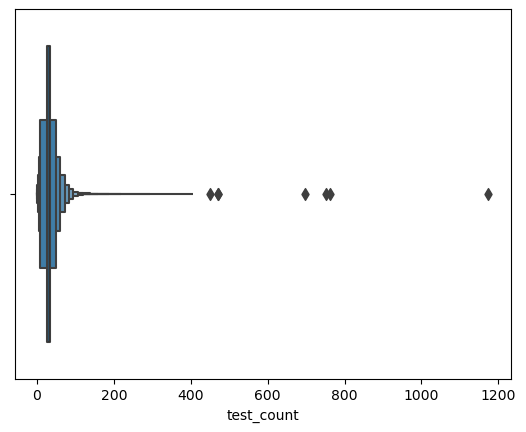

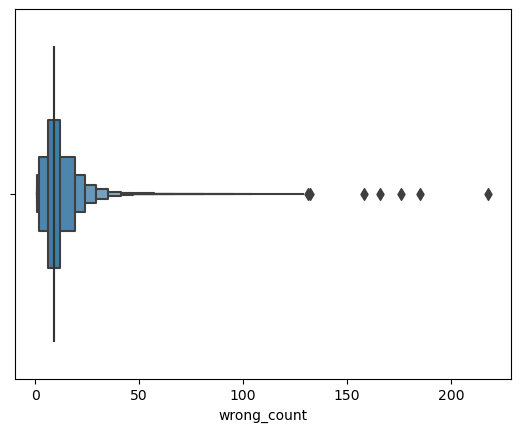

In [40]:
#memberstatus 는 onehot encoding
for i in col_list:
    sns.boxenplot(dataset2,x=i)
    plt.show()

In [41]:
def change_data(m,q1,q3,data):
    if data < q1:
        data = m
    elif data > q3:
        data = m
    return data

for i in col_list:
    q1 = dataset2[i].quantile(0.1)
    q3 = dataset2[i].quantile(0.9)
    median = dataset2[i].median() 
    dataset2[i] = dataset2[i].apply(lambda x : change_data(median,q1,q3,x))
    

In [42]:
print(dataset2.isna().sum())

memberstatus                  0
point_gain_count              0
point_gain                    0
point_loss_count              0
point_loss                    0
tablet_activeday_count        0
study_activeday_count         0
study_count                   0
study_completed_count         0
total_system_learning_time    0
media_count                   0
video_action_count            0
test_count                    0
wrong_count                   0
dtype: int64


In [43]:
#학생별 평가 평균 점수 예측하기 (선형 회귀)
#유사한 학습 횟수를 가지는 학생들 군집화
#member status -> onehot
#나머지는 MinMax scaler
oh = pd.get_dummies(dataset2['memberstatus'],dtype=float)
print(oh)
dataset2 = pd.concat([dataset2,oh],axis=1).drop('memberstatus',axis=1)


        11.0  44.0
0        0.0   1.0
1        0.0   1.0
2        0.0   1.0
3        0.0   1.0
4        0.0   1.0
...      ...   ...
211846   1.0   0.0
211847   1.0   0.0
211848   1.0   0.0
211849   1.0   0.0
211850   1.0   0.0

[211851 rows x 2 columns]


In [44]:
scaler = MinMaxScaler()
for i in list(dataset2.columns):
    dataset2[i] = scaler.fit_transform(np.array(dataset2[i]).reshape(-1,1))
#

In [45]:
dataset2.rename(columns = {11.0:'a',44.0:'b'},inplace=True)


In [46]:
labels = labels.fillna(labels.median())
trainx , testx, trainy, testy = train_test_split(dataset2,labels,train_size=0.6,random_state=42)


In [47]:
linear = LinearRegression().fit(trainx,trainy)
print(linear.score(trainx,trainy))
print(linear.score(testx,testy))

0.05619487091679087
0.06433269642353989


In [48]:
#유사한 학습 횟수를 가지는 학생들 군집화
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5,random_state=42)
trans = clus.fit_predict(dataset2[['study_count','study_completed_count']])


C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


<Axes: xlabel='study_count', ylabel='study_completed_count'>

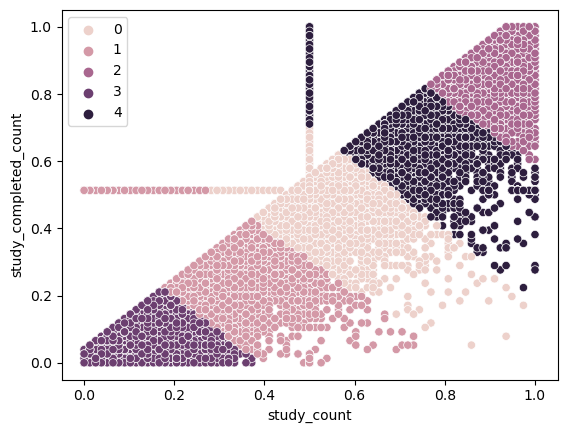

In [49]:
print(trans)
sns.scatterplot(dataset2,x='study_count',y='study_completed_count',hue=trans)

## 3. 학생별 과목별 점수 데이터

4일차 GMM을 통한 학생 수준별 군집화 실습을 통해 사용했던 데이터! --> 중1 데이터


본 데이터는 중2 데이터

### 3-1. 데이터 불러오기

In [50]:
dataset3 = pd.read_csv('./중2_AI진단평가_과목별점수.csv',index_col=0)
dataset3.head()

,응시기간,시험명,학년,응시일자,전체,국어,영어,수학,과학,사회,역사
0,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,338,68,93.0,71.0,NaN,53.0,53.0
1,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,50,18,0.0,9.0,NaN,23.0,NaN
2,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,65,29,36.0,NaN,NaN,NaN,NaN
3,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-24 00:00:00,276,75,72.0,76.0,NaN,38.0,15.0
4,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-26 00:00:00,29,29,0.0,0.0,NaN,0.0,0.0


### 3-2. 데이터 활용 아이디어

- 데이터 핸들링 하기 (시각화, groupby 등 다양한 전처리 연습하기)


- 유사 사용자 클러스터링 하기

In [51]:
print(dataset3) #2816개 11컬럼


                    응시기간     시험명  학년                 응시일자   전체  국어     영어  \
0     2021. 12 ~2022. 12  AI진단평가  중2  2021-12-23 00:00:00  338  68   93.0   
1     2021. 12 ~2022. 12  AI진단평가  중2  2021-12-23 00:00:00   50  18    0.0   
2     2021. 12 ~2022. 12  AI진단평가  중2  2021-12-23 00:00:00   65  29   36.0   
3     2021. 12 ~2022. 12  AI진단평가  중2  2021-12-24 00:00:00  276  75   72.0   
4     2021. 12 ~2022. 12  AI진단평가  중2  2021-12-26 00:00:00   29  29    0.0   
...                  ...     ...  ..                  ...  ...  ..    ...   
2811  2021. 12 ~2022. 12  AI진단평가  중2  2022-12-30 00:00:00  252  63   63.0   
2812  2021. 12 ~2022. 12  AI진단평가  중2  2022-12-30 00:00:00  191  72   65.0   
2813  2021. 12 ~2022. 12  AI진단평가  중2  2022-12-30 00:00:00  312  79  100.0   
2814  2021. 12 ~2022. 12  AI진단평가  중2  2022-12-31 00:00:00  335  51   86.0   
2815  2021. 12 ~2022. 12  AI진단평가  중2  2022-12-31 00:00:00  237  72   65.0   

        수학    과학    사회    역사  
0     71.0   NaN  53.0  53.0  
1      9.0   

In [52]:
print(dataset3.describe())

                전체           국어           영어           수학          과학  \
count  2816.000000  2816.000000  2788.000000  2759.000000  811.000000   
mean    214.785866    58.407315    49.365495    40.939833   37.485820   
std     106.241967    22.299637    28.672373    29.666578   30.061513   
min       9.000000     0.000000     0.000000     0.000000    0.000000   
25%     130.000000    47.000000    29.000000     9.000000    0.000000   
50%     233.000000    63.000000    58.000000    46.000000   38.000000   
75%     274.250000    75.000000    65.000000    63.000000   61.000000   
max     551.000000   100.000000   100.000000   100.000000  100.000000   

                사회           역사  
count  2752.000000  1739.000000  
mean     37.390988    32.476711  
std      27.946041    30.873324  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%      38.000000    30.000000  
75%      63.000000    56.000000  
max     100.000000   100.000000  


In [53]:
print(dataset3.isna().sum())

응시기간        0
시험명         0
학년          0
 응시일자       0
전체          0
국어          0
영어         28
수학         57
과학       2005
사회         64
역사       1077
dtype: int64


In [54]:
#과학하고 역사 nan값이 너무 높음 대체 불가 drop
dataset3 = dataset3.drop(columns=['과학','역사'],axis=1)

In [55]:
print(dataset3[' 응시일자'].unique())


['2021-12-23 00:00:00' '2021-12-24 00:00:00' '2021-12-26 00:00:00'
 '2021-12-27 00:00:00' '2021-12-28 00:00:00' '2021-12-29 00:00:00'
 '2021-12-30 00:00:00' '2022-01-01 00:00:00' '2022-01-02 00:00:00'
 '2022-01-03 00:00:00' '2022-01-04 00:00:00' '2022-01-05 00:00:00'
 '2022-01-06 00:00:00' '2022-01-07 00:00:00' '2022-01-08 00:00:00'
 '2022-01-09 00:00:00' '2022-01-10 00:00:00' '2022-01-11 00:00:00'
 '2022-01-12 00:00:00' '2022-01-13 00:00:00' '2022-01-14 00:00:00'
 '2022-01-15 00:00:00' '2022-01-16 00:00:00' '2022-01-17 00:00:00'
 '2022-01-18 00:00:00' '2022-01-19 00:00:00' '2022-01-20 00:00:00'
 '2022-01-21 00:00:00' '2022-01-22 00:00:00' '2022-01-23 00:00:00'
 '2022-01-24 00:00:00' '2022-01-25 00:00:00' '2022-01-26 00:00:00'
 '2022-01-27 00:00:00' '2022-01-28 00:00:00' '2022-01-29 00:00:00'
 '2022-01-31 00:00:00' '2022-02-02 00:00:00' '2022-02-03 00:00:00'
 '2022-02-04 00:00:00' '2022-02-05 00:00:00' '2022-02-06 00:00:00'
 '2022-02-07 00:00:00' '2022-02-08 00:00:00' '2022-02-09 00:00

In [56]:
subject = ['국어','영어','수학','사회'] # 각각이 score고 데이터셋의 크기가 작으므로 이상치 drop하지 않고 mean값으로 사용
for i in subject:
    dataset3[i].fillna(dataset3[i].mean())


In [57]:
dataset3[' 응시일자'] = dataset3[' 응시일자'].apply(lambda x : x[:7])

In [58]:
print(dataset3['응시기간'].unique())

['2021. 12 ~2022. 12']


In [59]:
dataset3 = dataset3.drop('응시기간',axis=1)

In [60]:

dt_list = list(dataset3.dtypes)

In [61]:
print(list(set(dt_list)))

[dtype('O'), dtype('int64'), dtype('float64')]


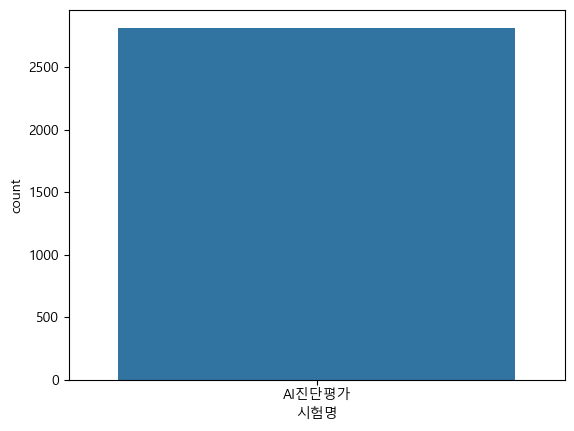

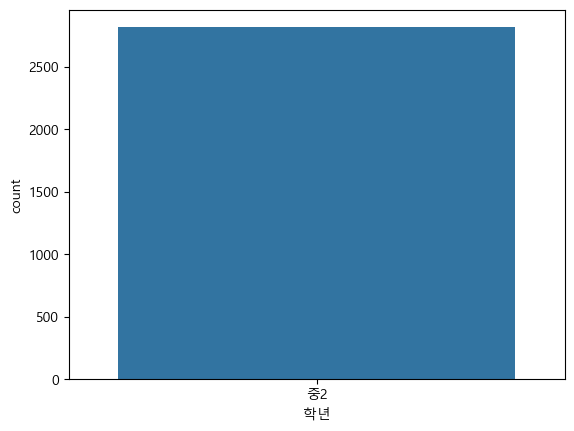

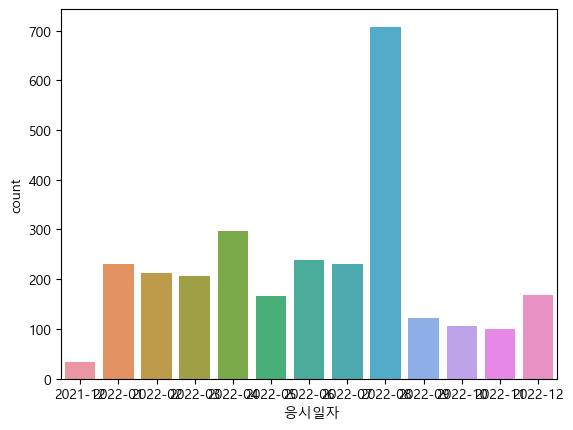

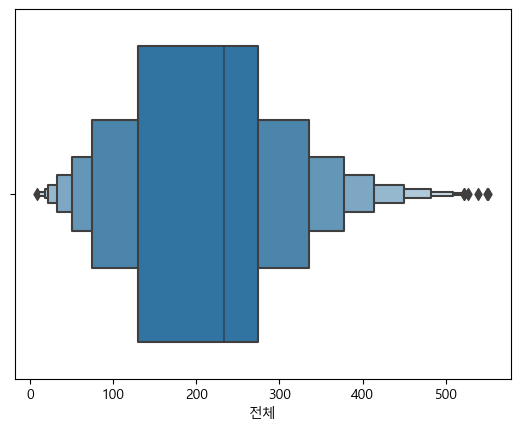

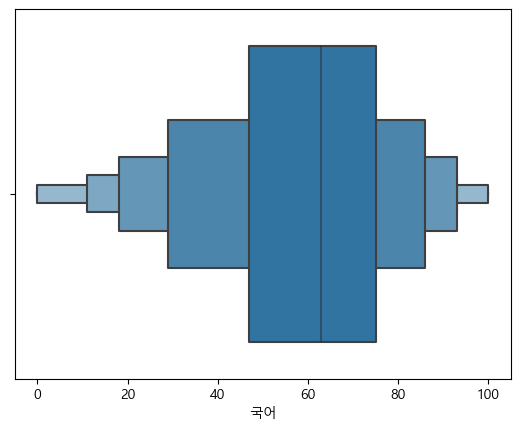

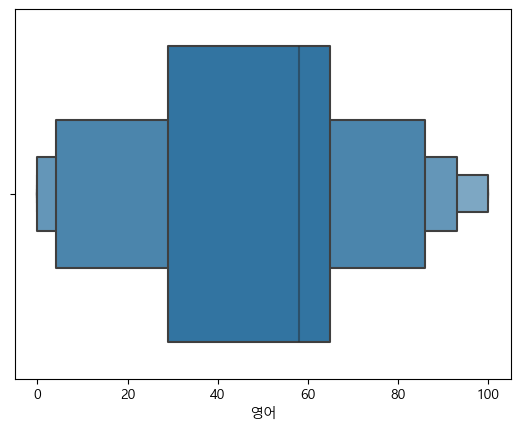

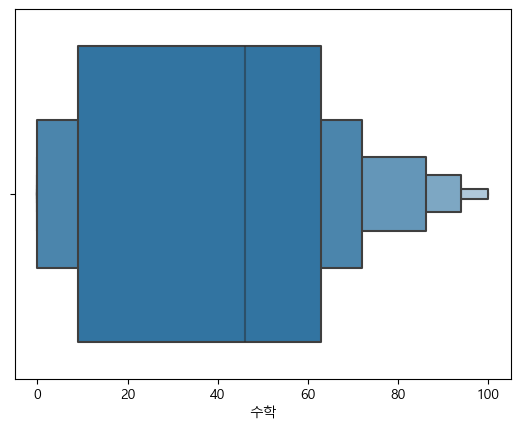

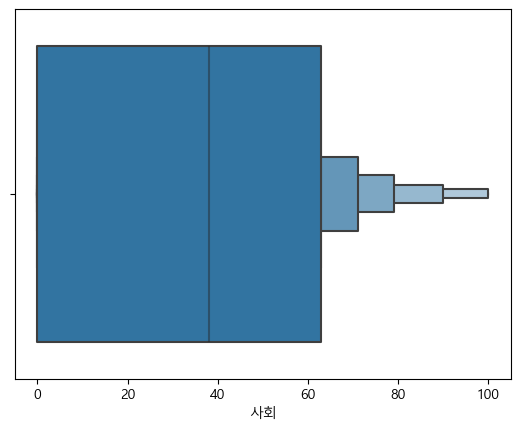

In [62]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

for i in list(dataset3.columns):
    if dataset3[i].dtypes == dt_list[1]:
        sns.countplot(dataset3,x=i)
        plt.show()
    else:
        sns.boxenplot(dataset3,x=i)
        plt.show()

In [63]:
#시험명과 학년은 제외해도됨
#특정 기간에 몰려서 시험봄
#사회가 가장 평균이 낮음
#국어가 가장 평균이 높음

In [64]:
dataset3 = dataset3.drop(columns=['시험명','학년'],axis=1)

In [65]:
print(dataset3.columns)

Index([' 응시일자', '전체', '국어', '영어', '수학', '사회'], dtype='object')


In [66]:
print(dataset3.describe()) #Min max 정규화 해도 1/100임
dataset3.isna().sum()

                전체           국어           영어           수학           사회
count  2816.000000  2816.000000  2788.000000  2759.000000  2752.000000
mean    214.785866    58.407315    49.365495    40.939833    37.390988
std     106.241967    22.299637    28.672373    29.666578    27.946041
min       9.000000     0.000000     0.000000     0.000000     0.000000
25%     130.000000    47.000000    29.000000     9.000000     0.000000
50%     233.000000    63.000000    58.000000    46.000000    38.000000
75%     274.250000    75.000000    65.000000    63.000000    63.000000
max     551.000000   100.000000   100.000000   100.000000   100.000000


 응시일자     0
전체        0
국어        0
영어       28
수학       57
사회       64
dtype: int64

In [67]:
for i in subject:

    dataset3[i] = dataset3[i].fillna(dataset3[i].mean())

In [68]:
scaler = MinMaxScaler()
subject.append('전체')

In [69]:
for i in subject:
    dataset3[i] = scaler.fit_transform(np.array(dataset3[i]).reshape(-1,1))

In [70]:
#응시일자 원핫인코딩 사용자 클러스터링하기

oh = pd.get_dummies(dataset3[' 응시일자'],dtype=float)
dataset3 = pd.concat([dataset3,oh],axis=1)
dataset3 = dataset3.drop(' 응시일자',axis=1)

In [71]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5,random_state=42)

In [72]:
pred = gmm.fit_predict(dataset3)
print(pred)

[3 3 3 ... 4 4 4]


C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [73]:
from collections import Counter
cnt = Counter(pred)
print(cnt)

Counter({0: 1076, 1: 708, 3: 633, 2: 231, 4: 168})


In [74]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42,metric='cosine')

tsne_v = tsne.fit_transform(dataset3)
print(tsne_v)

[[ 55.98        -5.0930963 ]
 [ 57.61026     -5.7517304 ]
 [ 56.754684    -5.720576  ]
 ...
 [-22.615553    -1.9260287 ]
 [-19.079609    -4.04593   ]
 [-23.359854     0.78967166]]


In [75]:
import plotly.express as px
px.scatter(x=tsne_v[:,0],y = tsne_v[:,1],color=pred,text=dataset3.index)

In [76]:
#같은 pred끼리 데이터 분포 비교해보자
dataset4 = dataset3.copy()

dataset4 = pd.concat([dataset4,pd.DataFrame(pred)],axis=1)

In [77]:
col_list = list(dataset4.columns)
print(col_list)

['전체', '국어', '영어', '수학', '사회', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', 0]


In [78]:
dataset4 = dataset4.rename(columns={0:'0'})

In [79]:
#dataset4['0']
dataset4['0'] = dataset4['0'].apply(lambda x: float(x))

In [90]:

# 0별 전체 국어 영어 수학 그룹바이 분석
print(dataset4.groupby('0').agg({'전체' : ['mean','max','min'],'국어' : ['mean','max','min'],'영어' : ['mean','max','min'],'수학' : ['mean','max','min'],'사회' : ['mean','max','min']}))

           전체                           국어                  영어            \
         mean       max      min      mean  max  min      mean  max  min   
0                                                                          
0.0  0.345164  1.000000  0.00000  0.567454  1.0  0.0  0.450998  1.0  0.0   
1.0  0.413086  0.929889  0.00369  0.603545  1.0  0.0  0.562428  1.0  0.0   
2.0  0.429083  0.955720  0.02952  0.584416  1.0  0.0  0.483333  1.0  0.0   
3.0  0.390966  0.998155  0.00369  0.591058  1.0  0.0  0.492426  1.0  0.0   
4.0  0.349488  0.743542  0.00369  0.581667  1.0  0.0  0.495855  1.0  0.0   

           수학                   사회            
         mean   max  min      mean  max  min  
0                                             
0.0  0.351497  1.00  0.0  0.326986  1.0  0.0  
1.0  0.472746  1.00  0.0  0.443231  1.0  0.0  
2.0  0.442246  1.00  0.0  0.386008  1.0  0.0  
3.0  0.432200  1.00  0.0  0.376763  1.0  0.0  
4.0  0.382195  0.94  0.0  0.354927  1.0  0.0  
